# Predicting stock price movements with indicators:

1) Simple Stock Online News Rating System

1.1) Intro (Ez Example)

1.2) With API


2) Word Search Count Rating System

2.1) With API

- It is believed that most would make decisions based on latest news that provides information related to stocks of investor's interest or look up their stocks online to determine growth performance of stock.


- The motive of this research project is to determine if indicators mentioned above are correlated to direction and magnitude of movement of stock price.

## 1) Simple Stock Online News Rating System

### 1.1) Intro (Example with Apple News during current coronavirus period)

In [1]:
# Import required packages
import bs4
import pandas as pd
import requests
import datetime
import calendar
import json
import os
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [2]:
# Set as current directory
os.chdir('C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1')

### a.)

In [3]:
# Execute function with API keys
with open('ak.txt', 'r') as myFile:
    keys=myFile.read()
    ts=TimeSeries(key=keys, output_format='pandas')

In [4]:
# Get the data
aapl_day, meta_data=ts.get_daily(symbol='AAPL', outputsize='full')

In [5]:
# Display first few rows of data
aapl_day.head()

,1. open,3. low,4. close,2. high,5. volume
date,,,,,
2000-03-24,142.44,135.50,138.69,143.94,3990300.0
2000-03-27,137.63,136.88,139.56,144.75,2492700.0
2000-03-28,137.25,137.13,139.13,142.00,1812200.0
2000-03-29,139.38,133.83,135.94,139.44,2141400.0
2000-03-30,133.56,125.44,125.75,137.69,3700000.0


In [6]:
# Resampling weekend stock data by interpolation and extracting only data from 1st January 2020 onwards 
# to match stock data since the beginning of coronavirus.
aapl_day=aapl_day.resample('24h').interpolate()
aapl_close=aapl_day['4. close']
aapl_day_2019=pd.DataFrame(aapl_close['2020-01-01':])

In [7]:
# Determine average returns to be set as benchmarks in later indictaor
aapl_returns=aapl_day_2019.pct_change()
aapl_mean_returns=aapl_returns.mean()
aapl_mean_returns

4. close   -0.001168
dtype: float64

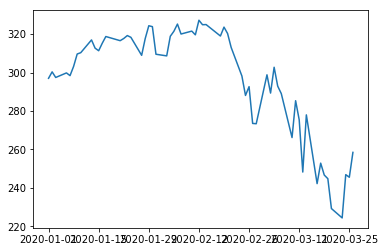

In [8]:
# Plot of stock price (closing)
plt.plot(aapl_day_2019)

### b.)

In [9]:
# Getting latest Apple news from bbc website

bbc_url = 'https://www.bbc.com/news/topics/crr7mlg0gqqt/apple'
bbc_response = requests.get(bbc_url)
bbc_title=[]
bbc_publish_date=[]

bbc_soup = bs4.BeautifulSoup(bbc_response.text, 'lxml')
bbc_headlines = bbc_soup.find_all(attrs={"class": "lx-stream-post__header-text"})


bbc_all_dates=bbc_soup.find_all(attrs={"class": "qa-meta-date gs-u-mr gs-u-display-inline-block"})
#all_dates2=soup.find_all(attrs={"class": "qa-meta-date gs-u-mr gs-u-display-inline-block"})


for bbc_headline in bbc_headlines:
    bbc_title.append(bbc_headline.text)
    
for bbc_dates in bbc_all_dates:
    bbc_publish_date.append(bbc_dates.text)

In [10]:
bbc_title=bbc_title[:-1]
bbc_title

['Movie streaming boom as people stay at home',
 'How to make a WhatsApp video call',
 'How to receive a video call without apps',
 'How to make a FaceTime call',
 'Smartphone sales collapse amid coronavirus crisis',
 'Apple hit with record €1.1bn fine in France',
 "Apple's annual showcase, WWDC, online only",
 'Apple reopens all its China stores',
 'Tricks and tools for better working from home']

In [11]:
bbc_publish_date

['22 Mar',
 '22 Mar',
 '22 Mar',
 '20 Mar',
 '16 Mar',
 '13 Mar',
 '13 Mar',
 '10 Mar',
 '3 Mar']

In [12]:
for i in range(0,len(bbc_publish_date)):
    bbc_publish_date[i]=bbc_publish_date[i]+' 2020'
    bbc_publish_date[i]= datetime.datetime.strptime(bbc_publish_date[i], '%d %b %Y')

bbc_publish_date

[datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 3, 0, 0)]

In [13]:
data={'News': bbc_title, 'Date': bbc_publish_date}
data_df=pd.DataFrame(data=data)
data_df

,Date,News
0,2020-03-22,Movie streaming boom as people stay at home
1,2020-03-22,How to make a WhatsApp video call
2,2020-03-22,How to receive a video call without apps
3,2020-03-20,How to make a FaceTime call
4,2020-03-16,Smartphone sales collapse amid coronavirus crisis
5,2020-03-13,Apple hit with record €1.1bn fine in France
6,2020-03-13,"Apple's annual showcase, WWDC, online only"
7,2020-03-10,Apple reopens all its China stores
8,2020-03-03,Tricks and tools for better working from home


### c.)

In [14]:
data_df['Expected']=0
indicator=data_df['Expected']
n=len(data_df)

for i in range(0,n):
    indicator[i]=input()

data_df['Expected']=indicator

1


C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
0
0
-1
-1
-1
1
0


In [15]:
# Extracted data from bbc apple news website and also predicted stock price rise/fall indicator
aapl_day_2019=aapl_day_2019.reset_index()
data_df

,Date,News,Expected
0,2020-03-22,Movie streaming boom as people stay at home,1
1,2020-03-22,How to make a WhatsApp video call,0
2,2020-03-22,How to receive a video call without apps,0
3,2020-03-20,How to make a FaceTime call,0
4,2020-03-16,Smartphone sales collapse amid coronavirus crisis,-1
5,2020-03-13,Apple hit with record €1.1bn fine in France,-1
6,2020-03-13,"Apple's annual showcase, WWDC, online only",-1
7,2020-03-10,Apple reopens all its China stores,1
8,2020-03-03,Tricks and tools for better working from home,0


### d.)

In [16]:
data_df_date=data_df['Date']
aapl_date=aapl_day_2019['date']

all_observed=[]
all_returns=[]

for i in range(0,len(data_df)): 
    row_index_1=aapl_date.loc[aapl_date == data_df_date[i]].index
    row_index_1=row_index_1[0]
    row_index_2=row_index_1+1
    value_1, value_2= aapl_day_2019.iloc[row_index_1]['4. close'], aapl_day_2019.iloc[row_index_2]['4. close']
    returns=((value_2-value_1)/value_2)
    
    if returns<=float(aapl_mean_returns):
        all_observed.append(-1)
    else:
        all_observed.append(1)
        
    all_returns.append(returns)
    

In [17]:
data_df['Observed']=all_observed
data_df['Returns']=all_returns


In [18]:
data_df

,Date,News,Expected,Observed,Returns
0,2020-03-22,Movie streaming boom as people stay at home,1,-1,-0.007235
1,2020-03-22,How to make a WhatsApp video call,0,-1,-0.007235
2,2020-03-22,How to receive a video call without apps,0,-1,-0.007235
3,2020-03-20,How to make a FaceTime call,0,-1,-0.007132
4,2020-03-16,Smartphone sales collapse amid coronavirus crisis,-1,1,0.042118
5,2020-03-13,Apple hit with record €1.1bn fine in France,-1,-1,-0.044804
6,2020-03-13,"Apple's annual showcase, WWDC, online only",-1,-1,-0.044804
7,2020-03-10,Apple reopens all its China stores,1,-1,-0.035980
8,2020-03-03,Tricks and tools for better working from home,0,1,0.044328


### e.)

In [19]:
data_df=data_df[data_df['Expected']!=0]
data_df

,Date,News,Expected,Observed,Returns
0,2020-03-22,Movie streaming boom as people stay at home,1,-1,-0.007235
4,2020-03-16,Smartphone sales collapse amid coronavirus crisis,-1,1,0.042118
5,2020-03-13,Apple hit with record €1.1bn fine in France,-1,-1,-0.044804
6,2020-03-13,"Apple's annual showcase, WWDC, online only",-1,-1,-0.044804
7,2020-03-10,Apple reopens all its China stores,1,-1,-0.035980


## Summary
It seems that the Apple News was only abe to get predict 40% of the stock price movements correctly( 2 out of 5),
but note that:

1) this is only a very small dataset as example (only able to extract first few latest news from website)

2) coronavirus virus certainly adds to the market uncertainty and stockholder panicking 

thus making it hard to predict future market movements although long term trend is a 
expected to be a downward slide in prices as seen in earlier plots.

### 1.2) News Rating System done with API

### b.)

In [20]:
url_aapl = ('http://newsapi.org/v2/everything?'
       'q=Apple&'
       'from=2020-02-26&'
       'to=2020-03-25&' 
       'sortBy=popularity&'
       'apiKey=647cb4a9ccad4020ac42a2c292b82419')

response = requests.get(url_aapl)

In [21]:
print(response.json())

{'totalResults': 66365, 'status': 'ok', 'articles': [{'publishedAt': '2020-03-10T14:00:00Z', 'content': 'Apple recently updated its App Store guidelines to allow apps to blast you with push notifications that contain advertising, marketing, or other promotions. The move doesnt come as much of a surprise, given that Apple has been doing this within its own apps f… [+2688 chars]', 'source': {'name': 'Lifehacker.com', 'id': None}, 'url': 'https://lifehacker.com/how-to-prevent-spammy-notifications-from-iphone-and-ipa-1842218148', 'description': 'Apple recently updated its App Store guidelines to allow apps to blast you with push notifications that contain advertising, marketing, or other promotions. The move doesn’t come as much of a surprise, given that Apple has been doing this within its own apps …', 'title': 'How to Prevent Spammy Notifications from iPhone and iPad Apps', 'author': 'David Murphy', 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progres

In [22]:
data_dict=response.json()
aapl_titles=[]
aapl_titles_dates=[]

for i in range(0,len(data_dict['articles'][:])):
    aapl_titles.append(data_dict['articles'][i]['title'])
    aapl_titles_dates.append(data_dict['articles'][i]['publishedAt'])
    
aapl_titles

['How to Prevent Spammy Notifications from iPhone and iPad Apps',
 'What to Do if Your iPhone Breaks While Apple Stores Are Closed',
 'The Best Mac Screensaver for Apple Devotees',
 "If You're Over 65 You May be Able to Get an Apple Watch Series 5 for $49",
 'Apple Card Will Let You Skip Your Payment This Month',
 'Check Your Asus and Huawei Routers to Fix This Wifi Vulnerability',
 "Apple Card's New Privacy Policy May Offer Second Chance to Rejected Applicants",
 'If Your iPad Air Just Went Blank, Apple Will Fix it for Free',
 'Where to Find Free eBooks During the Coronavirus Shutdown',
 'How to Tell if an iPhone Bug Is Eating Up Your Data Plan',
 "The Do's and Don'ts of Disinfecting Your Phone",
 'Uninstall These VPN and Ad-Blocking Apps That Spied on Your iPhone or Android',
 'Citric Acid Is Basically Sour MSG',
 "How to Watch Tonight's Democratic Debate",
 'Buy a Refurbished 2017 or 2018 MacBook Pro for $610 Today',
 'Siri Can Now Field Questions About Coronavirus',
 'Grab These WW

In [23]:
aapl_titles_dates

['2020-03-10T14:00:00Z',
 '2020-03-17T17:45:00Z',
 '2020-02-26T16:00:00Z',
 '2020-02-27T19:45:00Z',
 '2020-03-16T18:30:00Z',
 '2020-02-27T21:30:00Z',
 '2020-03-25T20:00:00Z',
 '2020-03-10T18:30:00Z',
 '2020-03-23T18:30:00Z',
 '2020-03-17T20:30:00Z',
 '2020-03-19T13:30:00Z',
 '2020-03-11T21:00:00Z',
 '2020-03-12T16:00:00Z',
 '2020-03-15T13:00:00Z',
 '2020-03-04T18:45:00Z',
 '2020-03-22T23:34:00Z',
 '2020-03-17T19:15:00Z',
 '2020-03-18T21:04:00Z',
 '2020-03-18T21:04:00Z',
 '2020-02-27T14:00:00Z']

In [24]:
aapl_dates=[]
for i in range(0,len(data_dict['articles'][:])):
    aapl_dates.append(aapl_titles_dates[i][0:10])
    aapl_dates[i]= datetime.datetime.strptime(aapl_dates[i], '%Y-%m-%d')

aapl_dates

[datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 17, 0, 0),
 datetime.datetime(2020, 2, 26, 0, 0),
 datetime.datetime(2020, 2, 27, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 2, 27, 0, 0),
 datetime.datetime(2020, 3, 25, 0, 0),
 datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 23, 0, 0),
 datetime.datetime(2020, 3, 17, 0, 0),
 datetime.datetime(2020, 3, 19, 0, 0),
 datetime.datetime(2020, 3, 11, 0, 0),
 datetime.datetime(2020, 3, 12, 0, 0),
 datetime.datetime(2020, 3, 15, 0, 0),
 datetime.datetime(2020, 3, 4, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 17, 0, 0),
 datetime.datetime(2020, 3, 18, 0, 0),
 datetime.datetime(2020, 3, 18, 0, 0),
 datetime.datetime(2020, 2, 27, 0, 0)]

In [25]:
data_2={'News': aapl_titles, 'Date': aapl_dates}
data_df_2=pd.DataFrame(data=data_2)
data_df_2.head()

,Date,News
0,2020-03-10,How to Prevent Spammy Notifications from iPhon...
1,2020-03-17,What to Do if Your iPhone Breaks While Apple S...
2,2020-02-26,The Best Mac Screensaver for Apple Devotees
3,2020-02-27,If You're Over 65 You May be Able to Get an Ap...
4,2020-03-16,Apple Card Will Let You Skip Your Payment This...


In [26]:
# Sort dates in ascending order
data_df_2=data_df_2.sort_values(by='Date')
data_df_2.head()

,Date,News
2,2020-02-26,The Best Mac Screensaver for Apple Devotees
19,2020-02-27,Apple's 'Instant Notes' Is a Must-Have on Your...
3,2020-02-27,If You're Over 65 You May be Able to Get an Ap...
5,2020-02-27,Check Your Asus and Huawei Routers to Fix This...
14,2020-03-04,Buy a Refurbished 2017 or 2018 MacBook Pro for...


##### All steps from here onwards will be the same as previous Section 1.1)

### c.)

In [27]:
data_df_2['Expected']=0
indicator=data_df_2['Expected']
n=len(data_df_2)

for i in range(0,n):
    indicator[i]=input()

data_df_2['Expected']=indicator

0


C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
1
1
-1
-1
1
1
0
0
0
0
0
0
1
0
0
0
0
0


### d.)

In [28]:
data_df_date_2=data_df_2['Date']
aapl_date=aapl_day_2019['date']

all_observed=[]
all_returns=[]

for i in range(0,len(data_df_2)): 
    row_index_1=aapl_date.loc[aapl_date == data_df_date_2[i]].index
    row_index_1=row_index_1[0]
    row_index_2=row_index_1+1
    value_1, value_2= aapl_day_2019.iloc[row_index_1]['4. close'], aapl_day_2019.iloc[row_index_2]['4. close']
    returns=((value_2-value_1)/value_2)
    
    if returns<=float(aapl_mean_returns):
        all_observed.append(-1)
    else:
        all_observed.append(1)
        
    all_returns.append(returns)
    

In [29]:
data_df_2['Observed']=all_observed
data_df_2['Returns']=all_returns
data_df_2

,Date,News,Expected,Observed,Returns
2,2020-02-26,The Best Mac Screensaver for Apple Devotees,1,-1,-0.035980
19,2020-02-27,Apple's 'Instant Notes' Is a Must-Have on Your...,0,-1,-0.025094
3,2020-02-27,If You're Over 65 You May be Able to Get an Ap...,1,-1,-0.069940
5,2020-02-27,Check Your Asus and Huawei Routers to Fix This...,-1,1,-0.000585
14,2020-03-04,Buy a Refurbished 2017 or 2018 MacBook Pro for...,1,1,0.042118
7,2020-03-10,"If Your iPad Air Just Went Blank, Apple Will F...",1,1,-0.000585
0,2020-03-10,How to Prevent Spammy Notifications from iPhon...,0,1,0.050066
11,2020-03-11,Uninstall These VPN and Ad-Blocking Apps That ...,0,-1,-0.035980
12,2020-03-12,Citric Acid Is Basically Sour MSG,0,1,0.091178
13,2020-03-15,How to Watch Tonight's Democratic Debate,0,-1,-0.025094


### e.)

In [30]:
data_df_2=data_df_2[data_df_2['Expected']!=0]
data_df_2

,Date,News,Expected,Observed,Returns
2,2020-02-26,The Best Mac Screensaver for Apple Devotees,1,-1,-0.035980
3,2020-02-27,If You're Over 65 You May be Able to Get an Ap...,1,-1,-0.069940
5,2020-02-27,Check Your Asus and Huawei Routers to Fix This...,-1,1,-0.000585
14,2020-03-04,Buy a Refurbished 2017 or 2018 MacBook Pro for...,1,1,0.042118
7,2020-03-10,"If Your iPad Air Just Went Blank, Apple Will F...",1,1,-0.000585
4,2020-03-16,Apple Card Will Let You Skip Your Payment This...,-1,-1,-0.067789
6,2020-03-25,Apple Card's New Privacy Policy May Offer Seco...,1,1,-0.000585


## Summary
It seems that the Apple News was only abe to get predict about 71% of the stock price movements correctly (5 out of 7),
but note that:

1) this is still a very small dataset as example (only able to extract first few latest news from website),
   currently using free version of API therefore provided data is limited to only previous few weeks.

2) coronavirus virus certainly adds to the market uncertainty and stockholder panicking 

In short, more history data would be required to determine potential of online news rating system and if possible, bein tested on data before year 2020. (before the age of coronavirus to prevent large influence of current global issue on investor's decision)

# To Be Continued......(Section 2, Word Search Count Rating System)